In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [ ]:

!pip install textblob wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile
import os

# Extract the uploaded ZIP file
with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall("unzipped_folder")

# Show files inside the unzipped folder
extracted = os.listdir("unzipped_folder")
print("Extracted files:", extracted)


Extracted files: ['student_feedback.csv']


In [ ]:
df = pd.read_csv("unzipped_folder/student_feedback.csv")
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:

!pip install textblob wordcloud


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


In [ ]:

df = pd.read_csv("unzipped_folder/student_feedback.csv")
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:

df.columns = df.columns.str.strip().str.lower()
print("Cleaned Column Names:\n", df.columns)

# Check and drop missing values (optional)
print("\nMissing values per column:\n", df.isnull().sum())
df.dropna(inplace=True)


Cleaned Column Names:
 Index(['unnamed: 0', 'student id', 'well versed with the subject',
       'explains concepts in an understandable way', 'use of presentations',
       'degree of difficulty of assignments', 'solves doubts willingly',
       'structuring of the course',
       'provides support for students going above and beyond',
       'course recommendation based on relevance'],
      dtype='object')

Missing values per column:
 unnamed: 0                                              0
student id                                              0
well versed with the subject                            0
explains concepts in an understandable way              0
use of presentations                                    0
degree of difficulty of assignments                     0
solves doubts willingly                                 0
structuring of the course                               0
provides support for students going above and beyond    0
course recommendation based on relev

In [ ]:

print("Rating Summary:\n", df['rating'].describe())

sns.countplot(x='rating', data=df)
plt.title("Rating Distribution")
plt.xlabel("Rating (1 to 5)")
plt.ylabel("Number of Responses")
plt.show()


KeyError: 'rating'

In [ ]:

print(df.columns.tolist())


['unnamed: 0', 'student id', 'well versed with the subject', 'explains concepts in an understandable way', 'use of presentations', 'degree of difficulty of assignments', 'solves doubts willingly', 'structuring of the course', 'provides support for students going above and beyond', 'course recommendation based on relevance']


In [ ]:
df.rename(columns={
    'well versed with the subject': 'subject_knowledge',
    'explains concepts in an understandable way': 'clarity',
    'use of presentations': 'presentations',
    'degree of difficulty of assignments': 'difficulty',
    'solves doubts willingly': 'doubt_solving',
    'structuring of the course': 'structure',
    'provides support for students going above and beyond': 'support',
    'course recommendation based on relevance': 'recommend'
}, inplace=True)

df.head()


,unnamed: 0,student id,subject_knowledge,clarity,presentations,difficulty,doubt_solving,structure,support,recommend
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


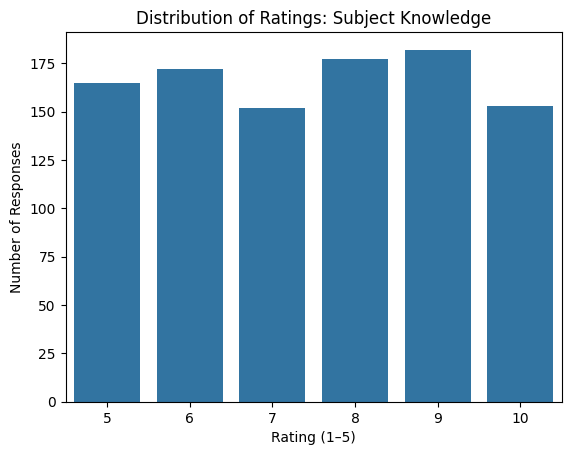

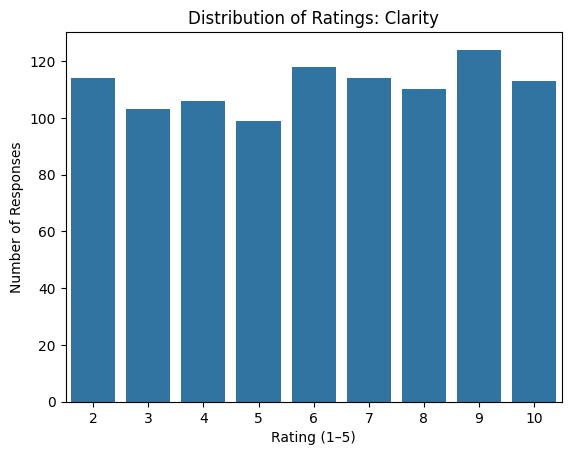

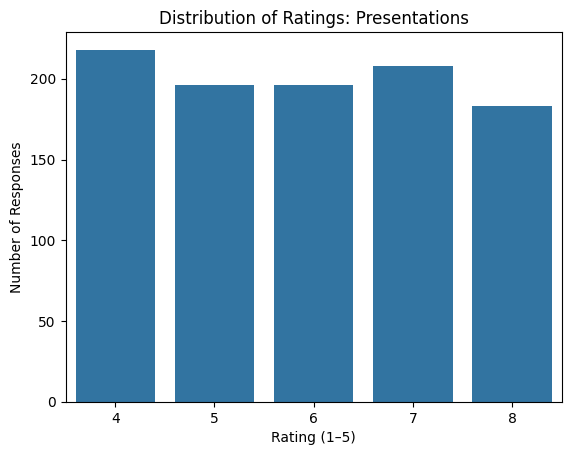

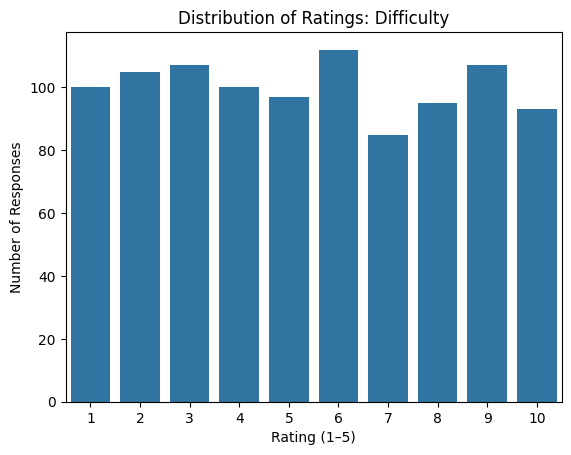

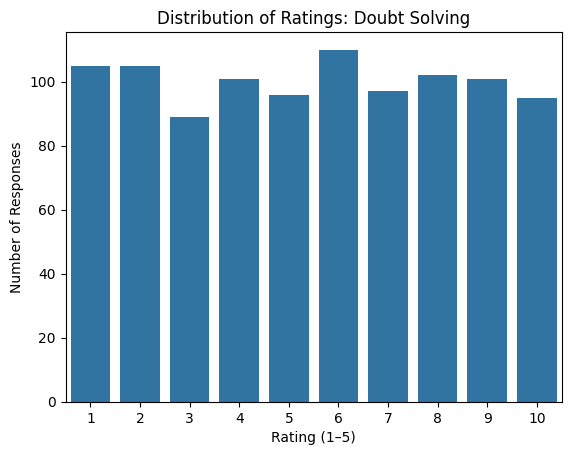

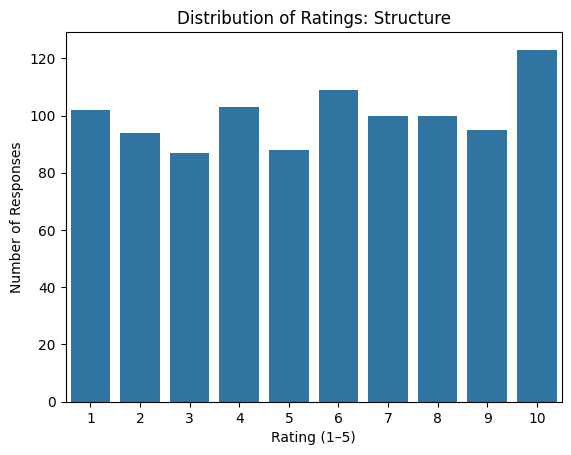

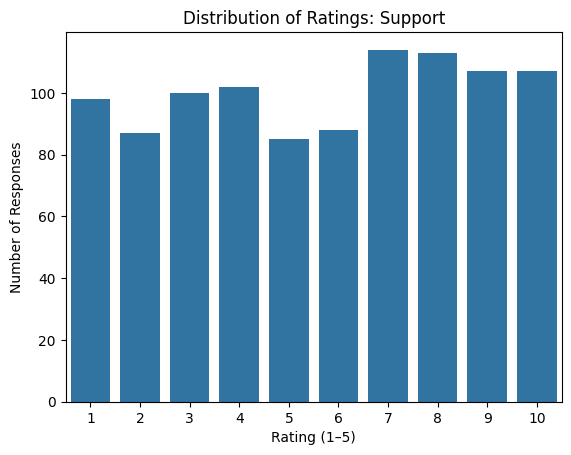

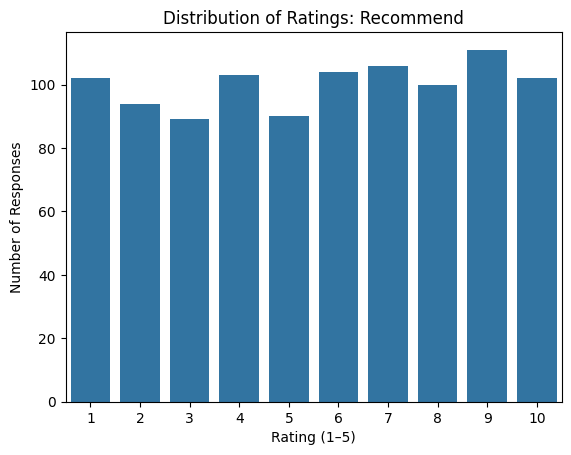

In [ ]:
rating_columns = ['subject_knowledge', 'clarity', 'presentations', 'difficulty',
                  'doubt_solving', 'structure', 'support', 'recommend']

import seaborn as sns
import matplotlib.pyplot as plt

for col in rating_columns:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of Ratings: {col.replace('_', ' ').title()}")
    plt.xlabel("Rating (1–5)")
    plt.ylabel("Number of Responses")
    plt.show()


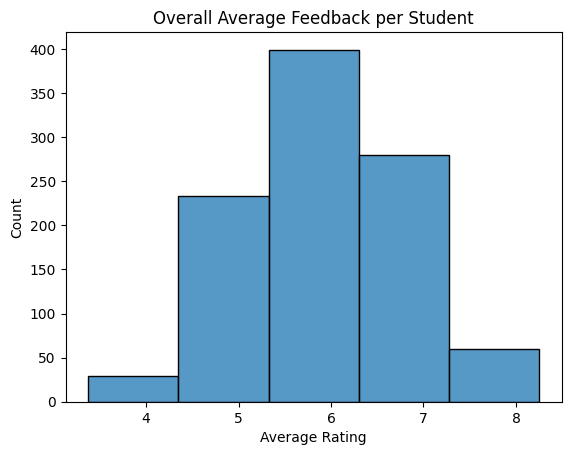

In [ ]:
df['average_feedback'] = df[rating_columns].mean(axis=1)
sns.histplot(df['average_feedback'], bins=5)
plt.title("Overall Average Feedback per Student")
plt.xlabel("Average Rating")
plt.show()
